In [ ]:
# https://gis.stackexchange.com/questions/417383/how-to-apply-gdal-polygonize 
# usar para vetorizar

In [3]:
################### LER A IMAGEM DE LUZ NOTURNA ####################
from osgeo import gdal, ogr, osr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os.path
import os

# informar o uso de exceções
gdal.UseExceptions()

# abrir o dataset da imagem RapidEye, com 5 bandas
# (ao usar o colab, lembre-se de fazer o upload na aba de arquivos)
dataset = gdal.Open("D:/Dissertacao/bd/raster/nighttime_STR_2020.tif", gdal.GA_ReadOnly)

# obter os objetos com as informações das bandas
avg_r = dataset.GetRasterBand(1)

# REFERENCIA ESPACIAL
print('sistema de coordenada da imagem: \n \n', dataset.GetProjectionRef())

sistema de coordenada da imagem: 
 
 LOCAL_CS["SIRGAS 2000 / UTM zone 21S",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


Text(0.5, 1.0, 'Banda 1 - avg_r')

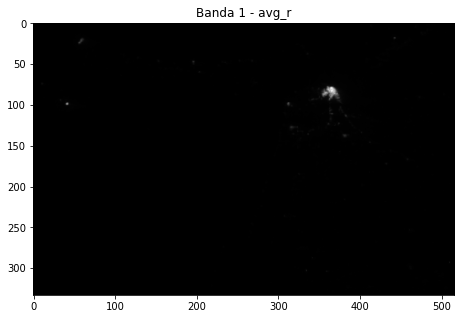

In [4]:
# Verificando a imagem
avg_r = dataset.GetRasterBand(1)

# obter as matrizes de pixels de cada banda
avg_r_array = avg_r.ReadAsArray()

# combinamos GDAL e Matplotlib para
# visualizar as bandas individualmente
plt.figure(figsize=(15, 5))
plt.imshow(avg_r_array, cmap='gray')
plt.title('Banda 1 - avg_r')

In [5]:
a = 'False'
########################### MODIFICAR PARA OS DESTINOS ESPECÍFICOS DESEJADOS #################################################
limiar = 0.8    # limiar inicial a ser utilizado na imagem                                                                   #
limiarizado = 'D:/Dissertacao/bd/raster/limiares/nighttime_STR_2020_limiar.tif'  # local onde o arquivo limiarizado fica     #
out_path = "D:/Dissertacao/bd/shapes/luzes_noturnas/nighttime_STR_2020_limiar.shp"  # destino do shape dos limiarizado       #
dst_layername = 'nighttime_STR_2020_limiar'  # nome do arquivo shp que sera criado                                           #
sc_urb = 'D:/Dissertacao/bd/shapes/area_urb/area_urb_str_Mod_setPrinc_2020.shp'  # setor censitário urbano                   #
bloco_notas = 'D:/Dissertacao/bd/raster/limiares/anotacoes_limiares.txt'  # local armazenado os valores de limiares testados #
########################### MODIFICAR PARA OS DESTINOS ESPECÍFICOS DESEJADOS #################################################

while 'False' in a:
    print('limiar ', limiar)
    classificacao = avg_r_array > limiar

    ####################### EXPORTANDO O RASTER LIMIARIZADO ######################
    if os.path.exists(limiarizado):
        os.remove(limiarizado)  # apagar arquivo pre-existente se tiver o mesmo nome que o limiarizado
    
    drv = gdal.GetDriverByName('GTiff')     # create driver for writing geotiff file
    outRaster = drv.CreateCopy(limiarizado, dataset , 0 )   # create new copy of inut raster on disk
    newBand = outRaster.GetRasterBand(1)                               # get the first (and only) band of the new copy
    newBand.WriteArray(classificacao)                                           # write array data to this band 
    outRaster = None  
     
    ######################## CONVERTER RASTER PARA VETOR ####################

    
    if os.path.exists(out_path):
        os.remove(out_path)
        
    #  get raster datasource
    src_ds = gdal.Open(limiarizado)
    srcband = src_ds.GetRasterBand(1)
    #dst_layername = 'nighttime_STR_2020_limiar'
    drv = ogr.GetDriverByName("ESRI Shapefile")
    dst_ds = drv.CreateDataSource(out_path)

    sp_ref = osr.SpatialReference()
    sp_ref.SetFromUserInput('EPSG:31981')

    dst_layer = dst_ds.CreateLayer(dst_layername, srs = sp_ref )

    fld = ogr.FieldDefn("Value", ogr.OFTInteger)
    dst_layer.CreateField(fld)
    dst_field = dst_layer.GetLayerDefn().GetFieldIndex("Value")

    gdal.Polygonize( srcband, None, dst_layer, dst_field, [], callback=None )

    del src_ds
    del dst_ds
    
    ################### COMPARAR VETORES - SOBREPOSICAO #################
    luz_not = gpd.read_file(out_path)

    # https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html
    reproj = luz_not.set_crs(epsg=31981)
    reproj = reproj[reproj['Value'] == 1].dissolve()
    
    area_urb = gpd.read_file(sc_urb)
    area_urb = area_urb[area_urb['CD_SETOR']=='150680705000001']
    
    a =  str(area_urb.within(reproj))
    print(area_urb.within(reproj))
    
    with open (bloco_notas, 'a') as arquivo:
        arquivo.write(str(limiar) + ' ###### ' + str(a))
    
    limiar = limiar - 0.001

print('LIMIAR ENCONTRADO: ', str(limiar + 0.001))



limiar  0.8
0    False
dtype: bool
limiar  0.799
0    False
dtype: bool
limiar  0.798
0    False
dtype: bool
limiar  0.797
0    False
dtype: bool
limiar  0.796
0    False
dtype: bool
limiar  0.795
0    False
dtype: bool
limiar  0.794
0    False
dtype: bool
limiar  0.793
0    False
dtype: bool
limiar  0.792
0    False
dtype: bool
limiar  0.791
0    False
dtype: bool
limiar  0.79
0    False
dtype: bool
limiar  0.789
0    False
dtype: bool
limiar  0.788
0    False
dtype: bool
limiar  0.787
0    False
dtype: bool
limiar  0.786
0    False
dtype: bool
limiar  0.785
0    False
dtype: bool
limiar  0.784
0    False
dtype: bool
limiar  0.783
0    False
dtype: bool
limiar  0.782
0    False
dtype: bool
limiar  0.781
0    False
dtype: bool
limiar  0.78
0    False
dtype: bool
limiar  0.779
0    False
dtype: bool
limiar  0.778
0    False
dtype: bool
limiar  0.777
0    False
dtype: bool
limiar  0.776
0    False
dtype: bool
limiar  0.775
0    False
dtype: bool
limiar  0.774
0    False
dtype: bool
limia

0    False
dtype: bool
limiar  0.6059999999999999
0    False
dtype: bool
limiar  0.6049999999999999
0    False
dtype: bool
limiar  0.6039999999999999
0    False
dtype: bool
limiar  0.6029999999999999
0    False
dtype: bool
limiar  0.6019999999999999
0    False
dtype: bool
limiar  0.6009999999999999
0    False
dtype: bool
limiar  0.5999999999999999
0    False
dtype: bool
limiar  0.5989999999999999
0    False
dtype: bool
limiar  0.5979999999999999
0    False
dtype: bool
limiar  0.5969999999999999
0    False
dtype: bool
limiar  0.5959999999999999
0    False
dtype: bool
limiar  0.5949999999999999
0    False
dtype: bool
limiar  0.5939999999999999
0    False
dtype: bool
limiar  0.5929999999999999
0    False
dtype: bool
limiar  0.5919999999999999
0    False
dtype: bool
limiar  0.5909999999999999
0    False
dtype: bool
limiar  0.5899999999999999
0    False
dtype: bool
limiar  0.5889999999999999
0    False
dtype: bool
limiar  0.5879999999999999
0    False
dtype: bool
limiar  0.5869999999999999


0    False
dtype: bool
limiar  0.4429999999999997
0    False
dtype: bool
limiar  0.4419999999999997
0    False
dtype: bool
limiar  0.4409999999999997
0    False
dtype: bool
limiar  0.4399999999999997
0    False
dtype: bool
limiar  0.4389999999999997
0    False
dtype: bool
limiar  0.4379999999999997
0    False
dtype: bool
limiar  0.4369999999999997
0    False
dtype: bool
limiar  0.4359999999999997
0    False
dtype: bool
limiar  0.4349999999999997
0    False
dtype: bool
limiar  0.4339999999999997
0    False
dtype: bool
limiar  0.4329999999999997
0    False
dtype: bool
limiar  0.4319999999999997
0    False
dtype: bool
limiar  0.4309999999999997
0    False
dtype: bool
limiar  0.4299999999999997
0    False
dtype: bool
limiar  0.4289999999999997
0    False
dtype: bool
limiar  0.4279999999999997
0    False
dtype: bool
limiar  0.4269999999999997
0    False
dtype: bool
limiar  0.4259999999999997
0    False
dtype: bool
limiar  0.4249999999999997
0    False
dtype: bool
limiar  0.4239999999999997


0    False
dtype: bool
limiar  0.2799999999999996
0    True
dtype: bool
LIMIAR ENCONTRADO:  0.2799999999999996


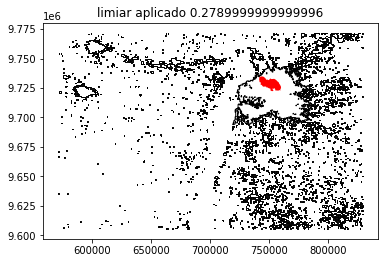

In [6]:
################### COMPARAR VETORES - SOBREPOSICAO #################
luz_not = gpd.read_file('D:/Dissertacao/bd/shapes/luzes_noturnas/nighttime_STR_2020_limiar.shp')

# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html
reproj = luz_not.set_crs(epsg=31981)
reproj = reproj[reproj['Value'] == 1].dissolve()
    
area_urb = gpd.read_file('D:/Dissertacao/bd/shapes/area_urb/area_urb_str_Mod_setPrinc_2020.shp')
area_urb = area_urb[area_urb['CD_SETOR']=='150680705000001']
    
a =  str(area_urb.within(reproj))
#print(area_urb.within(reproj))

base = reproj.plot(color='white', edgecolor='black')
base.set_title(f'limiar aplicado {limiar}')
area_urb.plot(ax=base, marker='o', color='red', markersize=5);